<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 : Bangkok Housing Data

### Contents:
- [Problem Statement](#Problem-Statement)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modelling](#Modelling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

# Problem Statement

Problem : House buyers want to estimate the affordability of a property and make informed choices about where to live.

Background : House buyers have a budget in mind when searching for a new home so they want to narrow down their options and identify properties that fall within their budgetary constraints.

Objectives : Understand the expected costs of house owner and whether they are making a sound financial investment.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno


from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Data Import and Cleaning

# Load Data

In [2]:
train_df = pd.read_json('Data/train.json')
test_df = pd.read_json('Data/test.json')
bkk = pd.read_csv('Data/bangkok_district.csv')

In [3]:
# Print out the first 5 rows
train_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000


In [4]:
#Check data shape
train_df.shape

(14271, 23)

#### train data : 14,271 rows x 23 columns including `price`

In [5]:
bkk.head()

,province,province_th,district,district_th,subdistrict,subdistrict_th
0,Bangkok,กรุงเทพฯ,Bang Bon,บางบอน,Bang Bon,บางบอน
1,Bangkok,กรุงเทพฯ,Bang Kapi,บางกะปิ,Hua Mak,หัวหมาก
2,Bangkok,กรุงเทพฯ,Bang Kapi,บางกะปิ,Khlong Chan,คลองจั่น
3,Bangkok,กรุงเทพฯ,Bang Khae,บางแค,Bang Khae,บางแค
4,Bangkok,กรุงเทพฯ,Bang Khae,บางแค,Bang Khae Nuea,บางแคเหนือ


## Data cleaning

In [6]:
#Check information of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

In [7]:
# Check for nulls
train_df.isna().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                3762
bedrooms                     43
baths                        35
floor_area                    0
floor_level                6178
land_area                  9354
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    7043
nearby_bus_stops           8262
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

In [8]:
#Check null in subdistrict
sub = train_df[train_df['subdistrict'].isna()]
sub

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
2474,10605666,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.,Condo,361.0,1.0,1.0,39,...,100.532691,3,"[[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT...",20.0,16.0,16,2016,February,"[Covered car park, Club, CCTV, Fitness corner,...",5800000
2933,10605671,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.,Condo,361.0,2.0,2.0,66,...,100.532691,3,"[[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT...",20.0,16.0,16,2016,February,"[Covered car park, Club, CCTV, Fitness corner,...",9900000
3082,10991002,Bangkok,Chatuchak,None,92 ซอยพหลโยธิน 32 (ถนนเสนานิคม 1),Condo,78.0,1.0,1.0,28,...,100.573752,2,"[[N12 Sena Nikhom BTS, 310], [N11 Ratchayothin...",20.0,7.0,9,2016,August,"[Covered car park, CCTV, Fitness corner, Jacuz...",2350000
5174,10781084,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...,Condo,79.0,1.0,1.0,43,...,100.606867,2,"[[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...",NaN,8.0,14,2012,July,"[Covered car park, Club, Clubhouse, CCTV, Fitn...",3390000
6428,10921491,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...,Condo,79.0,1.0,1.0,43,...,100.606867,2,"[[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...",NaN,8.0,14,2012,July,"[Covered car park, Club, Clubhouse, CCTV, Fitn...",3290000
8084,10605667,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.,Condo,361.0,1.0,1.0,39,...,100.532691,3,"[[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT...",20.0,16.0,16,2016,February,"[Covered car park, Club, CCTV, Fitness corner,...",5900000
8229,10605669,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.,Condo,361.0,2.0,2.0,66,...,100.532691,3,"[[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT...",20.0,16.0,16,2016,February,"[Covered car park, Club, CCTV, Fitness corner,...",9800000
8238,10611824,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.,Condo,361.0,1.0,1.0,39,...,100.532691,3,"[[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT...",20.0,16.0,16,2016,February,"[Covered car park, Club, CCTV, Fitness corner,...",5850000
9816,10918742,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.,Condo,361.0,1.0,1.0,39,...,100.532691,3,"[[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT...",20.0,16.0,16,2016,February,"[Covered car park, Club, CCTV, Fitness corner,...",6200000
10528,10559917,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...,Condo,79.0,2.0,2.0,62,...,100.606867,2,"[[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...",NaN,7.0,14,2012,July,"[Covered car park, Club, Clubhouse, CCTV, Fitn...",5160000


In [9]:
#Check subdistrict condition
sub['address'].str.split(' ')

2474       [ถนนนราธิวาสราช, แขวงทุ่งมหาเมฆ, เขตสาทร, กทม.]
2933       [ถนนนราธิวาสราช, แขวงทุ่งมหาเมฆ, เขตสาทร, กทม.]
3082               [92, ซอยพหลโยธิน, 32, (ถนนเสนานิคม, 1)]
5174     [ซอยสุขุมวิท, 64, แขวงบางจาก, เขตพระโขนง, กรุง...
6428     [ซอยสุขุมวิท, 64, แขวงบางจาก, เขตพระโขนง, กรุง...
8084       [ถนนนราธิวาสราช, แขวงทุ่งมหาเมฆ, เขตสาทร, กทม.]
8229       [ถนนนราธิวาสราช, แขวงทุ่งมหาเมฆ, เขตสาทร, กทม.]
8238       [ถนนนราธิวาสราช, แขวงทุ่งมหาเมฆ, เขตสาทร, กทม.]
9816       [ถนนนราธิวาสราช, แขวงทุ่งมหาเมฆ, เขตสาทร, กทม.]
10528    [ซอยสุขุมวิท, 64, แขวงบางจาก, เขตพระโขนง, กรุง...
11749      [ถนนนราธิวาสราช, แขวงทุ่งมหาเมฆ, เขตสาทร, กทม.]
Name: address, dtype: object

In [10]:
#drop column that can't define subdistrict
train_df.drop(index = 3082 , inplace = True)

In [11]:
#Reset index for drop row
train_df = train_df.reset_index()

In [12]:
#create function for replace null value
for i,address in enumerate(train_df['address']):
    if 'แขวงทุ่งมหาเมฆ' in address:
        train_df['subdistrict'][i] = 'Thung Maha Mek'
    elif 'แขวงบางจาก' in address:
        train_df['subdistrict'][i] = 'Bang Chak'

C:\Users\Pattr11\AppData\Local\Temp\ipykernel_8236\2215871159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['subdistrict'][i] = 'Bang Chak'
C:\Users\Pattr11\AppData\Local\Temp\ipykernel_8236\2215871159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['subdistrict'][i] = 'Thung Maha Mek'


In [13]:
#Check if still has null
train_df[train_df['subdistrict'].isna()]

,index,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price


In [14]:
#Random check result
train_df['subdistrict'][9815]

'Thung Maha Mek'

- Others null values appear in features that are referring to the property surrounding so will conclude that the null values represent unavailability instead.

In [15]:
# replace null value with 0
train_df.fillna(0 , inplace = True) 

In [16]:
#Recheck data
train_df.isna().sum()

index                      0
id                         0
province                   0
district                   0
subdistrict                0
address                    0
property_type              0
total_units                0
bedrooms                   0
baths                      0
floor_area                 0
floor_level                0
land_area                  0
latitude                   0
longitude                  0
nearby_stations            0
nearby_station_distance    0
nearby_bus_stops           0
nearby_supermarkets        0
nearby_shops               0
year_built                 0
month_built                0
facilities                 0
price                      0
dtype: int64

In [17]:
train_df.head()

,index,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",0.0,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",0.0,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",0.0,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,0.0,3.0,3.0,...,100.428438,0,0,0.0,2.0,4,0,0,"[Covered car park, Playground, 24 hours securi...",8900000
4,4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,0.0,3.0,2.0,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",0.0,6.0,15,0,0,"[Covered car park, 24 hours security]",2390000


In [18]:
#Delete column index
del train_df['index']

## Data Dictionary

|Feature|Type|Dataset|Description|
|:--|:--|:--|:--|
|id|int|train|identification of house
|province|object|train|a principal administrative division of certain countries
|district|object|train|an area of a country
|subdistrict|object|train|an administrative division that is a subdivision of a district       
|address|object|train|location of house               
|property_type|object|train|property characteristics        
|total_units|float|train|the total number of housing units            
|bedrooms|float|train|a room by its usage for sleeping               
|baths|float|train|a room that contains either a bathtub or a shower                     
|floor_area|int|train|the area taken up by a building or part of it                
|floor_level|float|train|floor at the level of the surrounding land or ground               
|land_area|float|train|the number of square kilometres of land in a given geographic area               
|latitude|float|train|measures the distance north or south of the equator                  
|longitude|float|train|measures distance east or west of the prime meridian              
|nearby_stations|int|train|number of station near the buiding           
|nearby_station_distance|object|train|name and distance of station near the buiding   
|nearby_bus_stops|float|train|number of bus stop near the buiding        
|nearby_supermarkets|float|train|number of supermaket near the buiding 
|nearby_shops|int|train|number of shop near the buiding            
|year_built|int|train|year when construction of the property              
|month_built|object|train|month when construction of the property               
|facilities|object|train|buildings, equipment,services that are provided in building             
|price|int|train|the amount of money set for sale the house          

# Exploratory Data Analysis

In [19]:
train_df.describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
count,1.427000e+04,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,1.427000e+04
mean,1.062612e+07,524.822565,1.875123,1.614366,79.870918,6.421163,83.717730,13.762809,100.565016,0.956342,5.914716,8.758795,10.447162,1422.695865,4.044243e+06
std,8.030326e+05,570.144450,1.096042,0.875487,69.702270,8.836254,1813.411189,0.092788,0.089578,1.085258,8.116751,5.473768,6.951136,917.756311,2.179939e+06
min,1.025114e+06,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.517062,100.273931,0.000000,0.000000,0.000000,1.000000,0.000000,4.800000e+05
25%,1.064584e+07,0.000000,1.000000,1.000000,32.000000,0.000000,0.000000,13.705177,100.512628,0.000000,0.000000,5.000000,4.000000,0.000000,2.250000e+06
50%,1.086983e+07,382.000000,1.000000,1.000000,47.000000,2.000000,0.000000,13.753742,100.569721,1.000000,0.000000,8.000000,9.000000,2013.000000,3.500000e+06
75%,1.097708e+07,800.000000,3.000000,2.000000,112.000000,10.000000,80.000000,13.837541,100.608786,2.000000,14.000000,13.000000,19.000000,2017.000000,5.500000e+06
max,1.104790e+07,4000.000000,10.000000,9.000000,766.000000,55.000000,137664.000000,14.022246,100.905485,3.000000,20.000000,20.000000,20.000000,2023.000000,9.999000e+06


C:\Users\Pattr11\AppData\Local\Temp\ipykernel_8236\1677039528.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


Text(0.5, 1.0, 'Correlation')

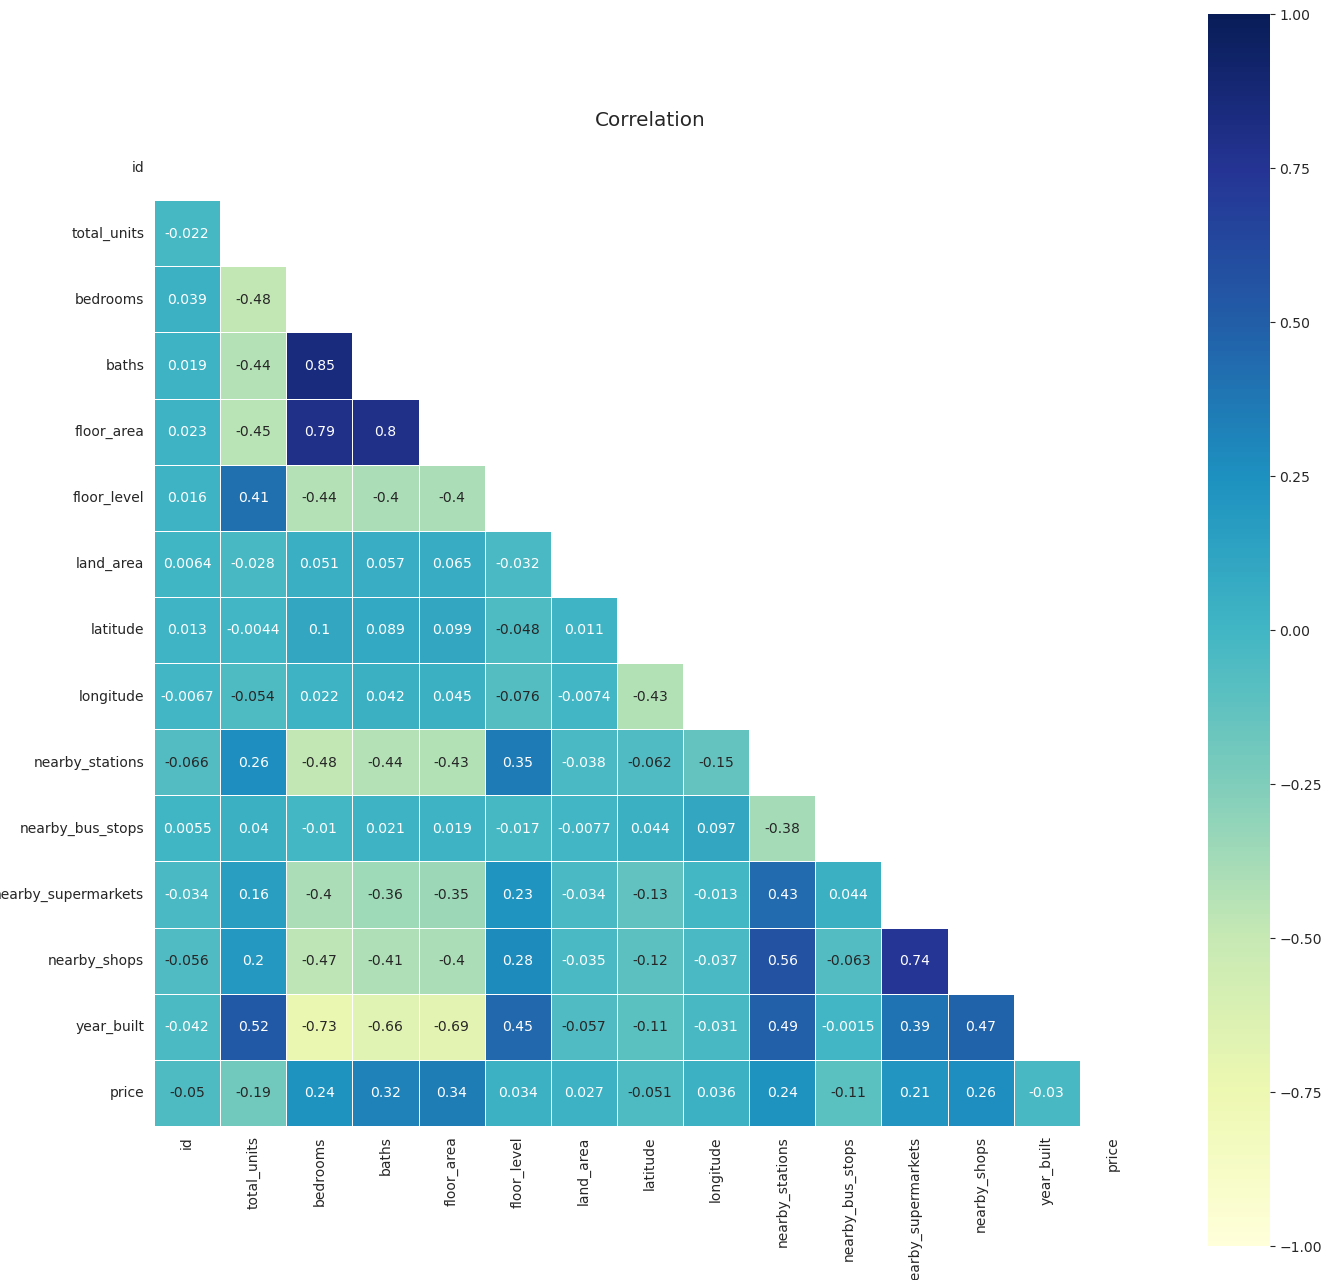

In [20]:
# Check correlation of numeric columns
plt.figure(figsize = (16,16))

corr = train_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5 , cmap="YlGnBu")
plt.title('Correlation')

Refer to heatmap : Price has strong correlation with bedrooms, baths , floor area , nearby stations , nearby shops and nearby supermarkets

C:\Users\Pattr11\AppData\Local\Temp\ipykernel_8236\3717155690.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7, 3, index)


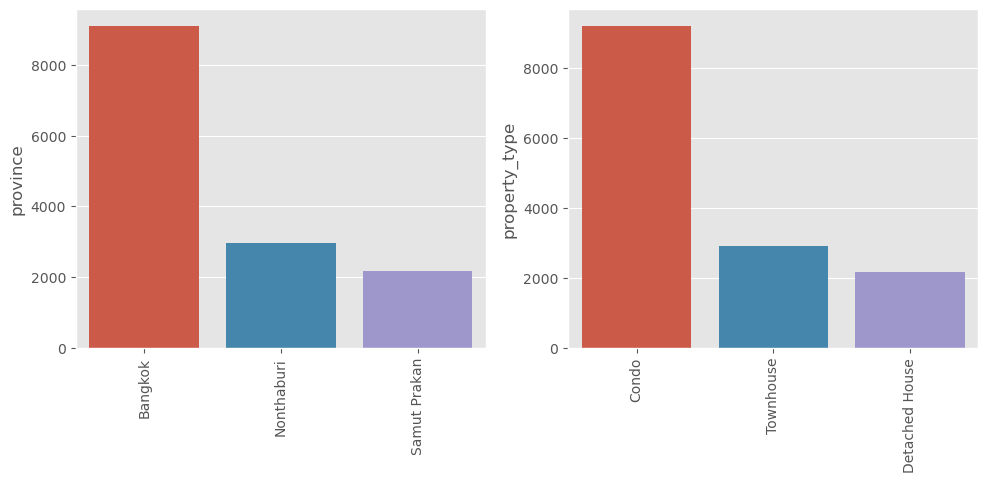

In [21]:
# analyze the different categorical features
obj = (train_df[['province','property_type']])

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in obj:
    y = train_df[col].value_counts()
    plt.subplot(7, 3, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

Bargraph : Most of data province is in Bangkok and data property type is condo type

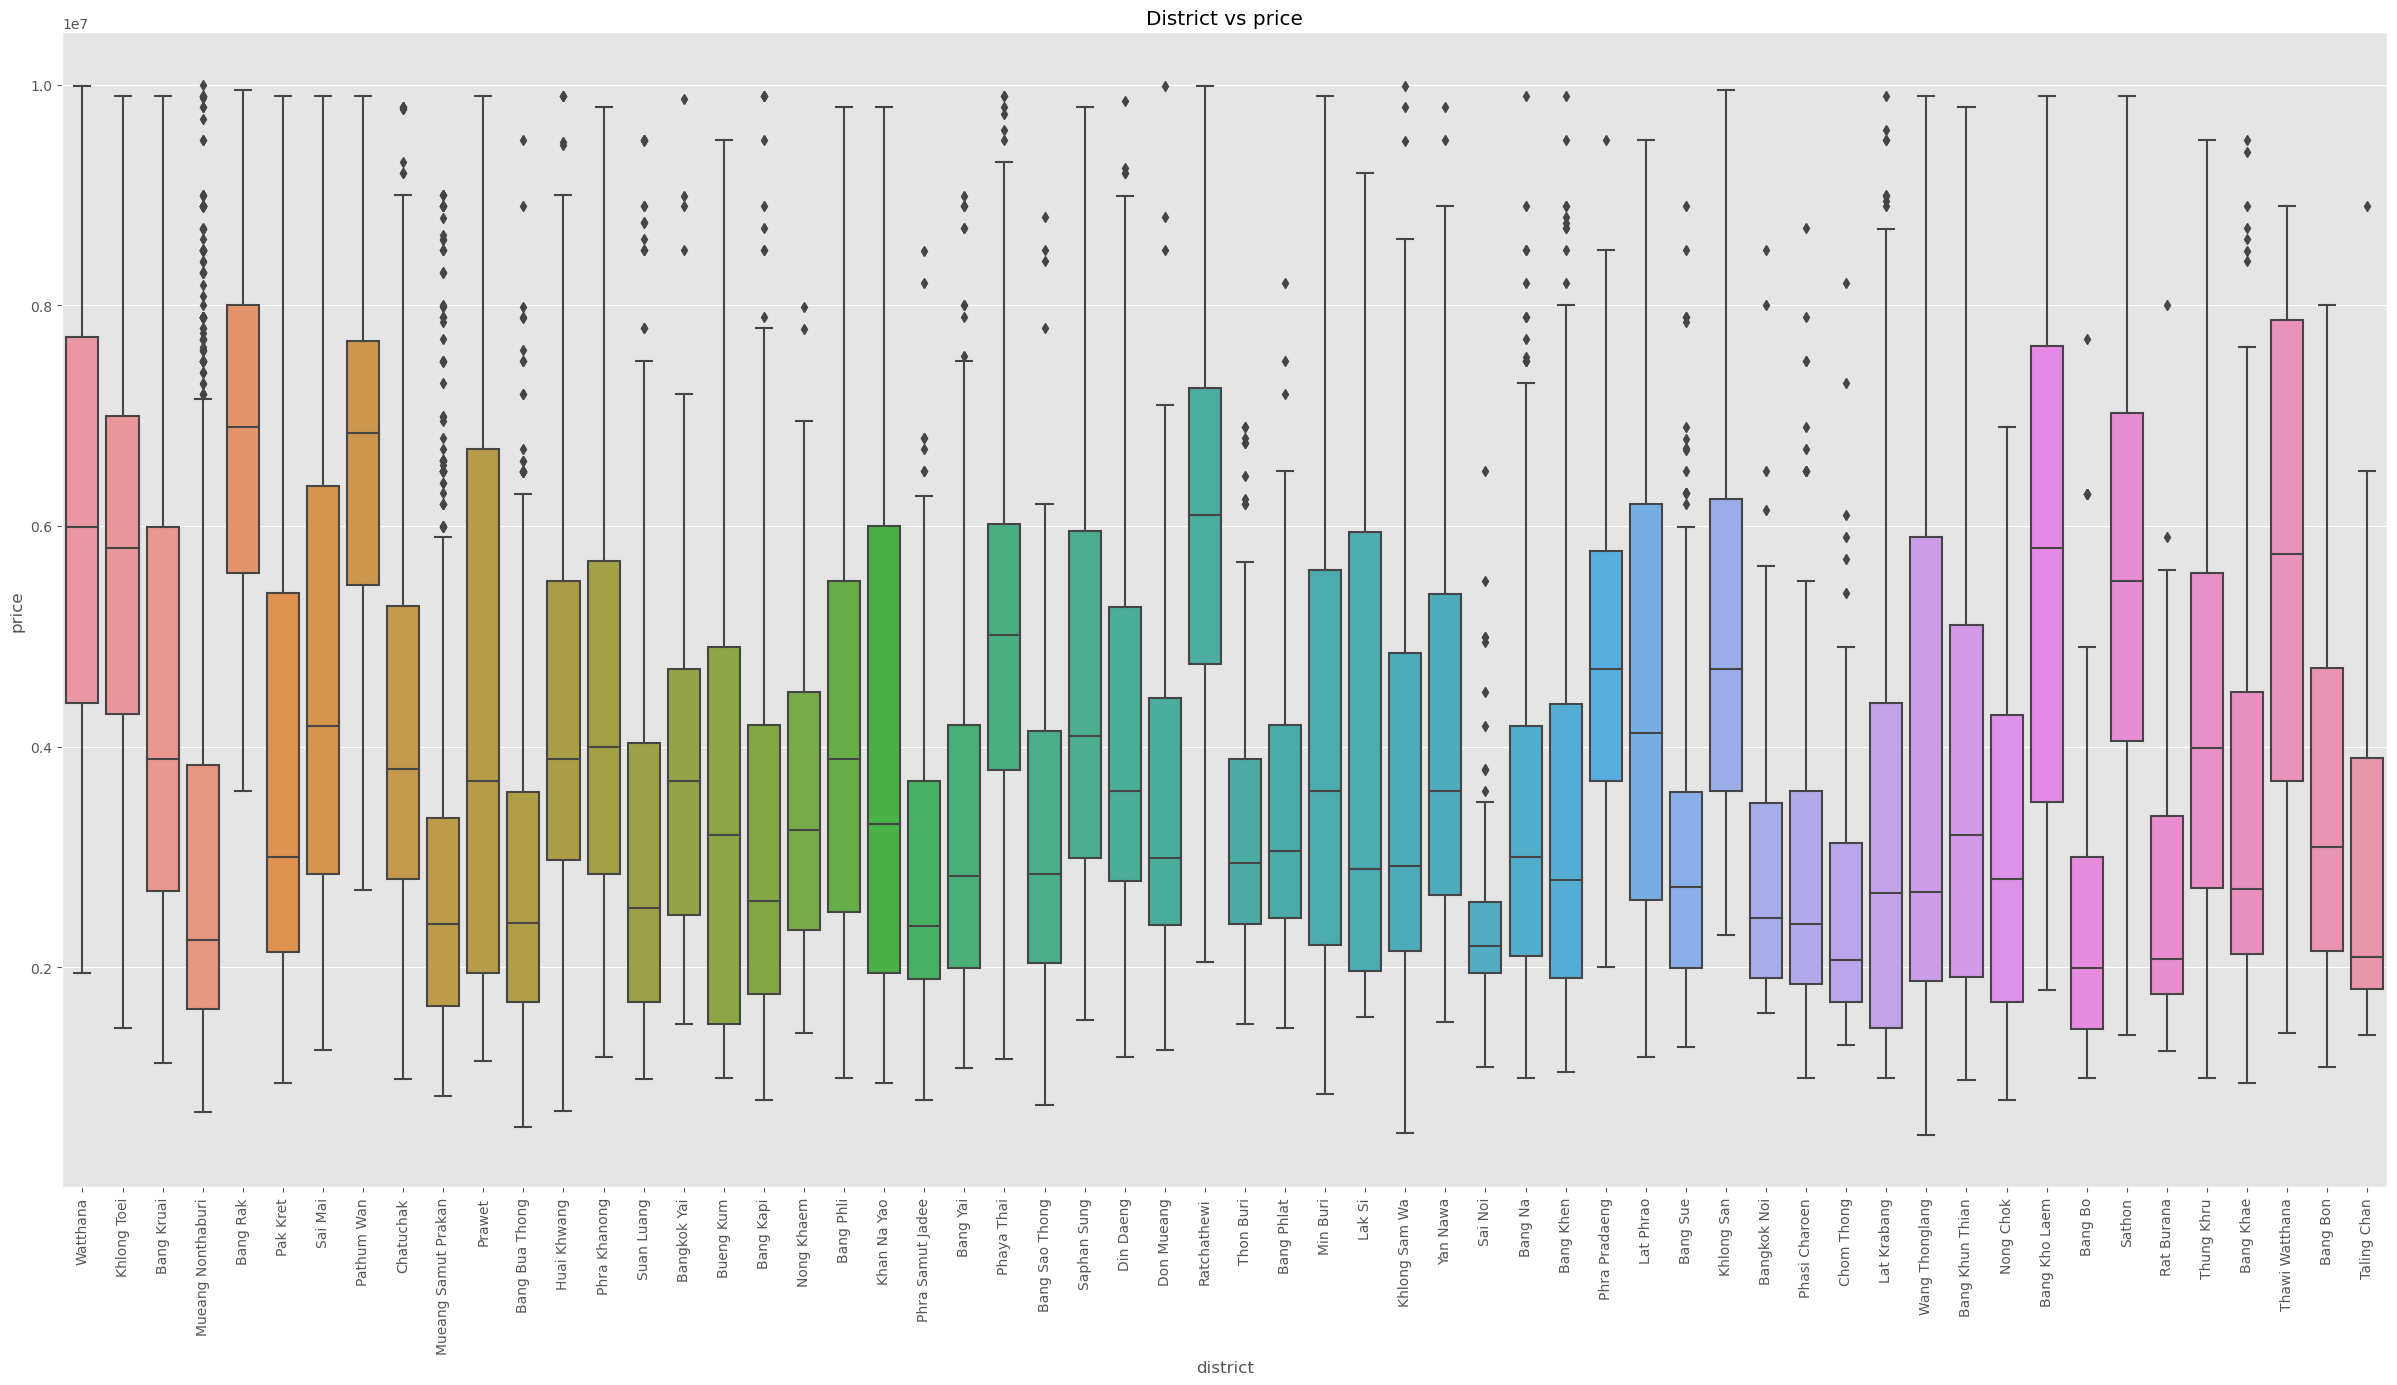

In [22]:
# visualizing the distribution of district and price

def boxplot(df):
        plt.figure(figsize=(30, 15))
        sns.boxplot(data=train_df, x='district', y="price" )
        plt.xticks(rotation=90)  # Set the x-axis text to be vertical
        plt.title("District vs price")
        plt.show()
    
boxplot(train_df)

Boxplot : Data columns district has lot of outlier and different district has some effect with price

# Modelling

## Model 1

In [23]:
#parameter refer to heatmap
X = train_df[['bedrooms' , 'baths' , 'floor_area' , 
              'nearby_stations' , 'nearby_shops', 'nearby_supermarkets']]
y = train_df['price']

In [24]:
lr = LinearRegression()

In [25]:
#Machine learning
lr.fit(X,y)

LinearRegression()

In [26]:
#Linear RMSE
np.sqrt(metrics.mean_squared_error(y,lr.predict(X)))

1675002.699480999

In [27]:
#Linear R-square 
lr.score(X,y)

0.4095640752071057

In [28]:
# Chang model to Ridge
from sklearn.linear_model import Ridge , RidgeCV

In [29]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0,5,10)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring = 'r2' , cv=5)
ridge_cv.fit(X , y)
# Fit model using best ridge alpha!

RidgeCV(alphas=array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [30]:
#RidgeCV MSE
np.sqrt(metrics.mean_squared_error(y , ridge_cv.predict(X)))

1675003.6897240132

In [31]:
#RidgeCV score
ridge_cv.score(X , y)

0.40956337708856205

In [32]:
# Chang model to Lasso
from sklearn.linear_model import Lasso, LassoCV

In [33]:
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(n_alphas = 100, cv=5 , max_iter=50000)
# Fit model using best ridge alpha!
lasso_cv.fit(X , y)

LassoCV(cv=5, max_iter=50000)

In [34]:
np.sqrt(metrics.mean_squared_error(y , lasso_cv.predict(X)))

1679468.4681415262

In [35]:
lasso_cv.score(X , y)

0.40641152482097187

## Model 2

In [36]:
#converted columns to 1/0
train = pd.get_dummies(data = train_df, columns=['property_type' ,'province'])

In [37]:
#parameter refer to model 1 + property type + province
X2 = train[['bedrooms' , 'baths' , 'floor_area' , 
              'nearby_stations' , 'nearby_shops', 'nearby_supermarkets' ,
            'property_type_Detached House' , 'property_type_Townhouse' , 'property_type_Condo',
            'province_Bangkok', 'province_Nonthaburi', 'province_Samut Prakan']]
y2 = train['price']

In [38]:
lr.fit(X2,y2)

LinearRegression()

In [39]:
np.sqrt(metrics.mean_squared_error(y2,lr.predict(X2)))

1550404.4004271682

In [40]:
lr.score(X2,y2)

0.49413837340817457

In [41]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0,5,10)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring = 'r2' , cv=5)
ridge_cv.fit(X2 , y2)
# Fit model using best ridge alpha!

RidgeCV(alphas=array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [42]:
np.sqrt(metrics.mean_squared_error(y2 , ridge_cv.predict(X2)))

1550408.491618457

In [43]:
ridge_cv.score(X2 , y2)

0.4941357036796701

In [44]:
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(n_alphas = 100, cv=5 , max_iter=50000)
# Fit model using best ridge alpha!
lasso_cv.fit(X2 , y2)

LassoCV(cv=5, max_iter=50000)

In [45]:
np.sqrt(metrics.mean_squared_error(y2 , lasso_cv.predict(X2)))

1570887.6139991644

In [46]:
lasso_cv.score(X2 , y2)

0.48068366636694737

## Model3

In [47]:
train = pd.get_dummies(data = train_df, columns=['property_type','district'])

In [48]:
train.columns

Index(['id', 'province', 'subdistrict', 'address', 'total_units', 'bedrooms',
       'baths', 'floor_area', 'floor_level', 'land_area', 'latitude',
       'longitude', 'nearby_stations', 'nearby_station_distance',
       'nearby_bus_stops', 'nearby_supermarkets', 'nearby_shops', 'year_built',
       'month_built', 'facilities', 'price', 'property_type_Condo',
       'property_type_Detached House', 'property_type_Townhouse',
       'district_Bang Bo', 'district_Bang Bon', 'district_Bang Bua Thong',
       'district_Bang Kapi', 'district_Bang Khae', 'district_Bang Khen',
       'district_Bang Kho Laem', 'district_Bang Khun Thian',
       'district_Bang Kruai', 'district_Bang Na', 'district_Bang Phlat',
       'district_Bang Phli', 'district_Bang Rak', 'district_Bang Sao Thong',
       'district_Bang Sue', 'district_Bang Yai', 'district_Bangkok Noi',
       'district_Bangkok Yai', 'district_Bueng Kum', 'district_Chatuchak',
       'district_Chom Thong', 'district_Din Daeng', 'district_Don

In [49]:
# property type + district
X3 = train[['bedrooms' , 'baths' , 'floor_area' , 
              'nearby_stations' , 'nearby_shops', 'nearby_supermarkets' ,
              'property_type_Detached House' , 'property_type_Townhouse' , 'property_type_Condo' ,
       'district_Bang Kapi', 'district_Bang Khae', 'district_Bang Khen',
       'district_Bang Kho Laem', 'district_Bang Khun Thian',
       'district_Bang Kruai', 'district_Bang Na', 'district_Bang Phlat',
       'district_Bang Phli', 'district_Bang Rak', 'district_Bang Sao Thong',
       'district_Bang Sue', 'district_Bang Yai', 'district_Bangkok Noi',
       'district_Bangkok Yai', 'district_Bueng Kum', 'district_Chatuchak',
       'district_Chom Thong', 'district_Din Daeng', 'district_Don Mueang',
       'district_Huai Khwang', 'district_Khan Na Yao',
       'district_Khlong Sam Wa', 'district_Khlong San', 'district_Khlong Toei',
       'district_Lak Si', 'district_Lat Krabang', 'district_Lat Phrao',
       'district_Min Buri', 'district_Mueang Nonthaburi',
       'district_Mueang Samut Prakan', 'district_Nong Chok',
       'district_Nong Khaem', 'district_Pak Kret', 'district_Pathum Wan',
       'district_Phasi Charoen', 'district_Phaya Thai',
       'district_Phra Khanong', 'district_Phra Pradaeng',
       'district_Phra Samut Jadee', 'district_Prawet', 'district_Rat Burana',
       'district_Ratchathewi', 'district_Sai Mai', 'district_Sai Noi',
       'district_Saphan Sung', 'district_Sathon', 'district_Suan Luang',
       'district_Taling Chan', 'district_Thawi Watthana', 'district_Thon Buri',
       'district_Thung Khru', 'district_Wang Thonglang', 'district_Watthana',
       'district_Yan Nawa' ]]
y3 = train['price']

In [50]:
lr.fit(X3,y3)

LinearRegression()

In [51]:
np.sqrt(metrics.mean_squared_error(y3,lr.predict(X3)))

1339545.6605812644

In [52]:
lr.score(X3,y3)

0.6223784286134885

In [53]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0,5,10)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring = 'r2' , cv=5)
ridge_cv.fit(X3 , y3)
# Fit model using best ridge alpha!

RidgeCV(alphas=array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [54]:
np.sqrt(metrics.mean_squared_error(y3 , ridge_cv.predict(X3)))

1339883.934986077

In [55]:
ridge_cv.score(X3 , y3)

0.6221876835794538

In [56]:
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(n_alphas = 100, cv=5 , max_iter=50000)
# Fit model using best ridge alpha!
lasso_cv.fit(X3 , y3)

LassoCV(cv=5, max_iter=50000)

In [57]:
np.sqrt(metrics.mean_squared_error(y3 , lasso_cv.predict(X3)))

1572834.7055216806

In [58]:
lasso_cv.score(X3 , y3)

0.4793954989916587

## Model 4

In [59]:
train = pd.get_dummies(data = train_df, columns=['property_type','district'])

In [60]:
X4 = train[['bedrooms' , 'baths' , 'floor_area' , 
              'nearby_stations' , 'nearby_shops', 'nearby_supermarkets' ,
              'property_type_Detached House' , 'property_type_Townhouse' , 'property_type_Condo' , 
            'district_Bang Bo', 'district_Bang Bon', 'district_Bang Bua Thong',
       'district_Bang Kapi', 'district_Bang Khae', 'district_Bang Khen',
       'district_Bang Kho Laem', 'district_Bang Khun Thian',
       'district_Bang Kruai', 'district_Bang Na', 'district_Bang Phlat',
       'district_Bang Phli', 'district_Bang Rak', 'district_Bang Sao Thong',
       'district_Bang Sue', 'district_Bang Yai', 'district_Bangkok Noi',
       'district_Bangkok Yai', 'district_Bueng Kum', 'district_Chatuchak',
       'district_Chom Thong', 'district_Din Daeng', 'district_Don Mueang',
       'district_Huai Khwang', 'district_Khan Na Yao',
       'district_Khlong Sam Wa', 'district_Khlong San', 'district_Khlong Toei',
       'district_Lak Si', 'district_Lat Krabang', 'district_Lat Phrao',
       'district_Min Buri', 'district_Mueang Nonthaburi',
       'district_Mueang Samut Prakan', 'district_Nong Chok',
       'district_Nong Khaem', 'district_Pak Kret', 'district_Pathum Wan',
       'district_Phasi Charoen', 'district_Phaya Thai',
       'district_Phra Khanong', 'district_Phra Pradaeng',
       'district_Phra Samut Jadee', 'district_Prawet', 'district_Rat Burana',
       'district_Ratchathewi', 'district_Sai Mai', 'district_Sai Noi',
       'district_Saphan Sung', 'district_Sathon', 'district_Suan Luang',
       'district_Taling Chan', 'district_Thawi Watthana', 'district_Thon Buri',
       'district_Thung Khru', 'district_Wang Thonglang', 'district_Watthana',
       'district_Yan Nawa' , 'land_area' , 'longitude' , 'floor_level' , 'year_built']]
y4 = train['price']

In [61]:
lr.fit(X4,y4)

LinearRegression()

In [62]:
#RMSE
np.sqrt(metrics.mean_squared_error(y4 , lr.predict(X4)))

1320539.2222809047

In [63]:
lr.score(X4,y4)

0.6330183394056466

In [64]:
# Chang model to Ridge
from sklearn.linear_model import Ridge , RidgeCV

In [65]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0,5,10)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring = 'r2' , cv=5)
ridge_cv.fit(X4 , y4)
# Fit model using best ridge alpha!

RidgeCV(alphas=array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [66]:
np.sqrt(metrics.mean_squared_error(y4 , ridge_cv.predict(X4)))

1320660.2907735163

In [67]:
ridge_cv.score(X4 , y4)

0.6329510457540737

In [68]:
# Chang model to Lasso
from sklearn.linear_model import Lasso, LassoCV

In [69]:
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(n_alphas = 100, cv=5 , max_iter=50000)
# Fit model using best ridge alpha!
lasso_cv.fit(X4 , y4)

LassoCV(cv=5, max_iter=50000)

In [70]:
lasso_cv.alpha_

104789.77706216749

In [71]:
np.sqrt(metrics.mean_squared_error(y4 , lasso_cv.predict(X4)))

1645355.5710681996

In [72]:
lasso_cv.score(X4 , y4)

0.43028023885373545

In [73]:
#Check over or underfit for Linear
cross_val_score(lr ,X4,y4 , cv=100)

array([0.71798829, 0.63899257, 0.58967974, 0.61080172, 0.67161893,
       0.5920412 , 0.55176367, 0.70764475, 0.65000885, 0.59762398,
       0.55421156, 0.71905472, 0.6549866 , 0.62963595, 0.59105438,
       0.62017944, 0.67442518, 0.63096148, 0.66052552, 0.60071257,
       0.69443377, 0.54747636, 0.60888644, 0.60759615, 0.61667609,
       0.61654366, 0.6954865 , 0.63080973, 0.675459  , 0.59350336,
       0.57396204, 0.70224251, 0.6537278 , 0.73491053, 0.64062637,
       0.67605594, 0.69174508, 0.58213833, 0.66084246, 0.66657575,
       0.57031544, 0.67211808, 0.53073961, 0.62785234, 0.62169442,
       0.59361498, 0.64192874, 0.68475003, 0.60753909, 0.67878466,
       0.71547522, 0.64083888, 0.62471941, 0.62341381, 0.5210057 ,
       0.53461073, 0.59691936, 0.4865116 , 0.55053166, 0.59420132,
       0.6682591 , 0.62455345, 0.62553959, 0.60896893, 0.65827015,
       0.5796359 , 0.3974406 , 0.56598012, 0.67634038, 0.61100492,
       0.61660251, 0.65256934, 0.53806307, 0.65038633, 0.66825

In [74]:
cross_val_score(lr ,X4,y4 , cv=100).mean()

0.6254405063611753

In [75]:
#Check over or underfit for Ridge
cross_val_score(ridge_cv ,X4,y4 , cv=100)

array([0.71910227, 0.63902495, 0.59041049, 0.61022047, 0.66943937,
       0.5916241 , 0.55246127, 0.70730248, 0.65008531, 0.59645938,
       0.55456746, 0.71833776, 0.65553355, 0.63150055, 0.59209954,
       0.61922416, 0.6743307 , 0.63069125, 0.66041956, 0.59941889,
       0.69440421, 0.54836877, 0.6095885 , 0.60746105, 0.61703128,
       0.61662854, 0.69523741, 0.6291724 , 0.6758159 , 0.59252562,
       0.57425399, 0.70210401, 0.6541457 , 0.73565346, 0.63903861,
       0.67582412, 0.69107115, 0.58161298, 0.66083224, 0.66674455,
       0.57000354, 0.67178343, 0.52976548, 0.62829704, 0.6228949 ,
       0.59427917, 0.64168571, 0.68521172, 0.60732869, 0.67866686,
       0.71547165, 0.64147188, 0.62556585, 0.62305776, 0.51995555,
       0.5337528 , 0.59604357, 0.485801  , 0.5507073 , 0.59331208,
       0.66763464, 0.62348139, 0.62582102, 0.60883043, 0.65924316,
       0.57779606, 0.40170141, 0.5658292 , 0.67745217, 0.61054496,
       0.61637277, 0.6530636 , 0.53980879, 0.6504756 , 0.66835

In [76]:
cross_val_score(ridge_cv ,X4,y4 , cv=100).mean()

0.6254696685324755

In [77]:
#Check over or underfit for Lasso
cross_val_score(lasso_cv ,X4,y4 , cv=100)

array([0.53143551, 0.40321759, 0.4394653 , 0.41524042, 0.44292281,
       0.33479077, 0.43366671, 0.53631887, 0.4752586 , 0.42182065,
       0.43732392, 0.44911314, 0.48332487, 0.37989954, 0.41212379,
       0.29637175, 0.45790844, 0.37005989, 0.45954718, 0.34124735,
       0.35371018, 0.38563958, 0.40687634, 0.46919862, 0.52310919,
       0.42086852, 0.44914412, 0.27999186, 0.43661654, 0.45030327,
       0.46825078, 0.50561916, 0.47850637, 0.52946389, 0.42730089,
       0.402394  , 0.46364701, 0.42251396, 0.49817779, 0.45206331,
       0.37734004, 0.44720638, 0.37768618, 0.45459739, 0.460038  ,
       0.39274013, 0.55141483, 0.53358564, 0.41834831, 0.49375154,
       0.49522098, 0.45083085, 0.36400299, 0.45741488, 0.26495464,
       0.35323943, 0.43037896, 0.34449203, 0.34421636, 0.36416785,
       0.4091696 , 0.31588563, 0.39859348, 0.45525245, 0.40874312,
       0.36690123, 0.39370406, 0.39690138, 0.4379388 , 0.34051083,
       0.43816758, 0.439982  , 0.36480846, 0.40633307, 0.38666

In [78]:
cross_val_score(lasso_cv ,X4,y4 , cv=100).mean()

0.42421422809566833

 - Choose Model 4 for prediction with RidgeCV for the best prediction

# How to submit

- preprocess test data in the same way as train data
- after that, predict `price` and create `submission.csv`
- `submission.csv` must have 2 columns: `id` and `price`
- **NEVER** drop any row in the test data

In [79]:
# test data has id and features, but does not have price
test_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."


In [80]:
#Check null value
test_df.isna().sum()

id                            0
province                      0
district                      0
subdistrict                   3
address                       0
property_type                 0
total_units                 642
bedrooms                     10
baths                        10
floor_area                    0
floor_level                1099
land_area                  1659
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    1222
nearby_bus_stops           1474
nearby_supermarkets          86
nearby_shops                  0
year_built                    0
month_built                1002
facilities                    0
dtype: int64

In [81]:
#check missing value in subdistrict
test_df[test_df['subdistrict'].isna()]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
540,8476937,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...,Condo,79.0,1.0,1.0,46,...,13.689652,100.606867,2,"[[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...",NaN,7.0,14,2012,July,"[Covered car park, Club, Clubhouse, CCTV, Fitn..."
1448,10605668,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.,Condo,361.0,2.0,2.0,66,...,13.717888,100.532691,3,"[[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT...",20.0,16.0,16,2016,February,"[Covered car park, Club, CCTV, Fitness corner,..."
1993,10841475,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...,Condo,79.0,1.0,2.0,74,...,13.689652,100.606867,2,"[[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...",NaN,7.0,14,2012,July,"[Covered car park, Club, Clubhouse, CCTV, Fitn..."


In [82]:
#replace missing value in subdistrict
for i,address in enumerate(test_df['address']):
    if 'แขวงทุ่งมหาเมฆ' in address:
        test_df['subdistrict'][i] = 'Thung Maha Mek'
    elif 'แขวงบางจาก' in address:
        test_df['subdistrict'][i] = 'Bang Chak'

C:\Users\Pattr11\AppData\Local\Temp\ipykernel_8236\2515318607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['subdistrict'][i] = 'Bang Chak'
C:\Users\Pattr11\AppData\Local\Temp\ipykernel_8236\2515318607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['subdistrict'][i] = 'Thung Maha Mek'


In [83]:
test_df['subdistrict'].isna().sum()

0

In [84]:
# replace null value with 0
test_df.fillna(0 , inplace = True) 

In [85]:
#create function for replace null value
test_df = pd.get_dummies(data = test_df, columns=['property_type','district'])

In [86]:
# Use same features as Model 4
X_test = test_df[['bedrooms' , 'baths' , 'floor_area' , 
              'nearby_stations' , 'nearby_shops', 'nearby_supermarkets' ,
              'property_type_Detached House' , 'property_type_Townhouse' , 'property_type_Condo' , 
            'district_Bang Bo', 'district_Bang Bon', 'district_Bang Bua Thong',
       'district_Bang Kapi', 'district_Bang Khae', 'district_Bang Khen',
       'district_Bang Kho Laem', 'district_Bang Khun Thian',
       'district_Bang Kruai', 'district_Bang Na', 'district_Bang Phlat',
       'district_Bang Phli', 'district_Bang Rak', 'district_Bang Sao Thong',
       'district_Bang Sue', 'district_Bang Yai', 'district_Bangkok Noi',
       'district_Bangkok Yai', 'district_Bueng Kum', 'district_Chatuchak',
       'district_Chom Thong', 'district_Din Daeng', 'district_Don Mueang',
       'district_Huai Khwang', 'district_Khan Na Yao',
       'district_Khlong Sam Wa', 'district_Khlong San', 'district_Khlong Toei',
       'district_Lak Si', 'district_Lat Krabang', 'district_Lat Phrao',
       'district_Min Buri', 'district_Mueang Nonthaburi',
       'district_Mueang Samut Prakan', 'district_Nong Chok',
       'district_Nong Khaem', 'district_Pak Kret', 'district_Pathum Wan',
       'district_Phasi Charoen', 'district_Phaya Thai',
       'district_Phra Khanong', 'district_Phra Pradaeng',
       'district_Phra Samut Jadee', 'district_Prawet', 'district_Rat Burana',
       'district_Ratchathewi', 'district_Sai Mai', 'district_Sai Noi',
       'district_Saphan Sung', 'district_Sathon', 'district_Suan Luang',
       'district_Taling Chan', 'district_Thawi Watthana', 'district_Thon Buri',
       'district_Thung Khru', 'district_Wang Thonglang', 'district_Watthana',
       'district_Yan Nawa' , 'land_area' , 'longitude' , 'floor_level' , 'year_built']]

In [87]:
# prediction
pred_test = ridge_cv.predict(X_test)
pred_test[:10]

array([5460917.25216579, 6161118.64741373, 4838511.84405625,
       5261396.87110662, 2766106.40054524, 5559153.40946376,
       3600955.19493201, 3929804.87310329, 3418948.4565469 ,
       3685578.18466246])

In [88]:
lr.score(X_test,pred_test)

0.9998525189749227

In [89]:
X_test['id'] = test_df['id']

C:\Users\Pattr11\AppData\Local\Temp\ipykernel_8236\2484543332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['id'] = test_df['id']


In [90]:
X_test['price'] = pred_test

C:\Users\Pattr11\AppData\Local\Temp\ipykernel_8236\742221253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['price'] = pred_test


In [91]:
# save as csv file
test_df['price'] = pred_test
test_df[['id','price']].to_csv('ridge_submission.csv', index=False)

# Conclusions and Recommendations

Conclusions :  House prices can vary significantly depending on various factors like features and surrounding of the house, including location, property size and house condition but house that more convenience, price will be more expensive like more rooms and use of space or near station , shop and downtown.
After considering all the above factors the model predicted value may not much accurate, due to incomplete Data , outlier and model complexity such as too many features or parameters.

Recommendations : For a housebuyer who have limit budget should consider create a list of features in a house that are in need to narrow down the choices and stay in the budget.